 
**Irys (ang. *Iris dataset*)** to **jeden z najsłynniejszych zbiorów danych w uczeniu maszynowym** — używany od dziesięcioleci do nauki klasyfikacji. Zawiera dane o **kwiatach kosaćca (łac. *Iris*)** trzech różnych gatunków.

---
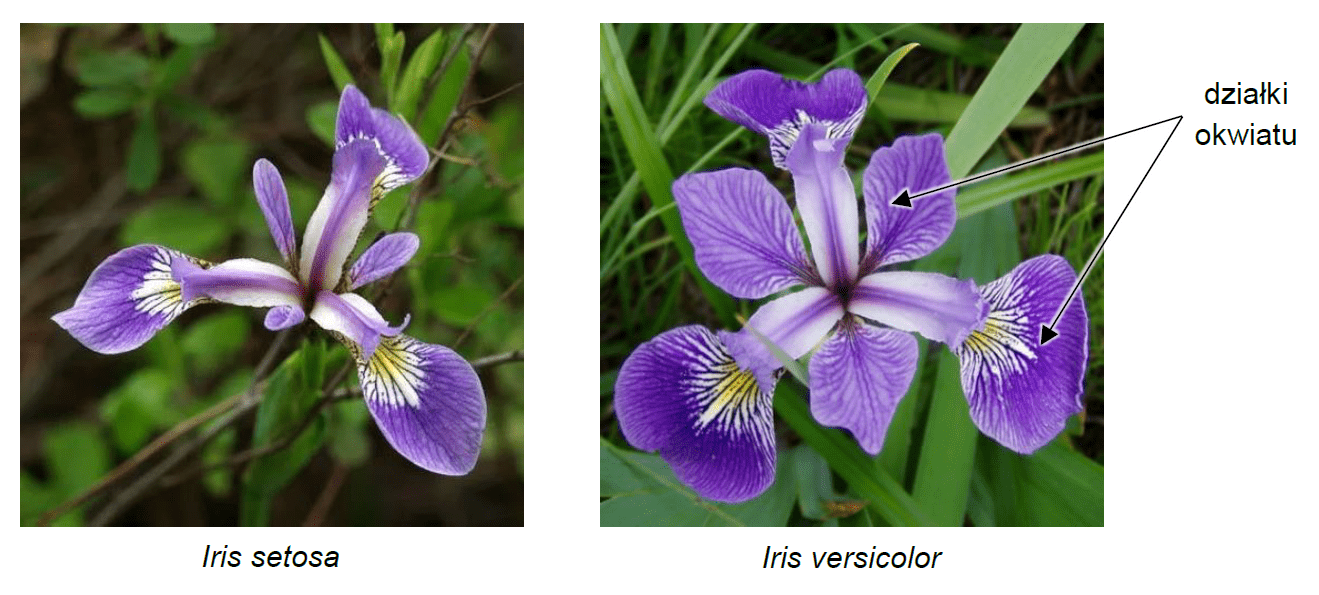
## 🌼 Co dokładnie zawiera zbiór *Iris*?

Zbiór został opracowany przez **Ronalda Fishera** w 1936 roku i składa się z:

* **150 rekordów (obserwacji)** — po **50 dla każdego gatunku**:

  * *Iris setosa*
  * *Iris versicolor*
  * *Iris virginica*

* **4 cech (zmiennych)** opisujących każdy kwiat:

  1. `sepal length` – długość działki kielicha (cm)
  2. `sepal width` – szerokość działki kielicha (cm)
  3. `petal length` – długość płatka (cm)
  4. `petal width` – szerokość płatka (cm)

* **etykieta klasy** – czyli gatunek irysa (0, 1, lub 2).

---
  
## 📊 Do czego się go używa

Zbiór *Iris* to klasyczny przykład do testowania algorytmów klasyfikacji:

* **SVM (Support Vector Machine)** — jak w Twoim pliku
* **KNN**, **Drzewa decyzyjne**, **Regresja logistyczna**, **Sieci neuronowe**

Ponieważ dane są małe i dobrze rozdzielne, idealnie nadają się do nauki.

---

## 🌈 Wizualnie

Często wizualizuje się *Iris* na wykresie 2D:

* np. długość i szerokość płatka,
* a punkty koloruje się według gatunku.

Taki wykres pokazuje, że:

* *Setosa* jest bardzo łatwa do odróżnienia,
* *Versicolor* i *Virginica* częściowo się nakładają.

---
 


In [3]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = iris.data        # cechy (4 kolumny)
y = iris.target      # etykiety (0, 1, 2)
print(iris.feature_names)
print(iris.target_names)


# Utworzenie DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['species'] = [iris.target_names[i] for i in y]

# Wyświetlenie tabeli
print(df.head(10))  # wyświetla pierwsze 10 wierszy

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target s

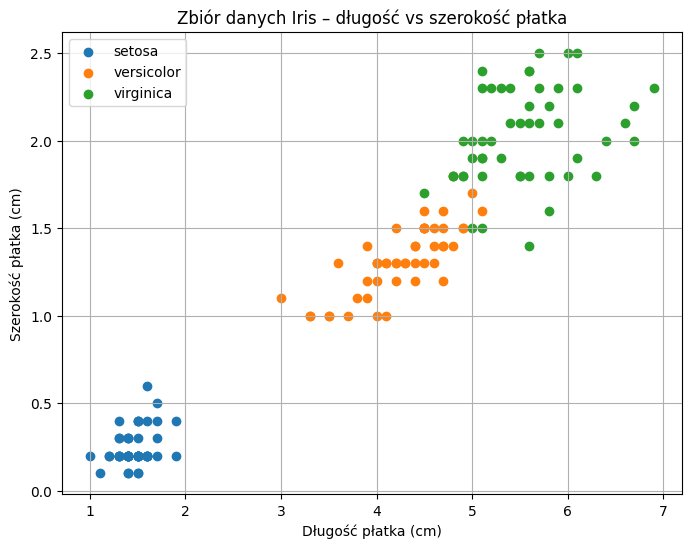

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Wczytanie danych Iris
iris = load_iris()
X = iris.data            # cechy (4 kolumny)
y = iris.target          # etykiety (0, 1, 2)
target_names = iris.target_names  # nazwy gatunków

# Wykres: długość płatka vs szerokość płatka
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X[y == i, 2], X[y == i, 3], label=target_name)

# Opisy osi i tytuł
plt.xlabel("Długość płatka (cm)")
plt.ylabel("Szerokość płatka (cm)")
plt.title("Zbiór danych Iris – długość vs szerokość płatka")

# Legenda i siatka
plt.legend()
plt.grid(True)
plt.show()


 
---

## 🧠 1️⃣ Co to jest **drzewo decyzyjne**

Drzewo decyzyjne to **model uczenia maszynowego**, który:

* **dzieli dane na mniejsze grupy**,
* na każdym poziomie zadaje **pytanie (warunek)** o jakąś cechę,
* **liście** drzewa to końcowe decyzje (np. gatunek kwiatu).

Przykład „myślenia drzewa”:

> jeśli `długość płatka < 2.5 cm` → **to setosa**
> jeśli `długość płatka >= 2.5 cm` → sprawdź `szerokość płatka`...

---

## 📊 2️⃣ Dane: Iris

Każdy wiersz = 1 kwiat, opisany przez 4 liczby:

| cecha        | opis                       |
| ------------ | -------------------------- |
| sepal length | długość działki kielicha   |
| sepal width  | szerokość działki kielicha |
| petal length | długość płatka             |
| petal width  | szerokość płatka           |

---

## 🧩 3️⃣ Jak działa nauka drzewa

1. Algorytm wybiera **najlepszą cechę**, która najbardziej „dzieli” dane.
   (np. „długość płatka < 2.5” oddziela *setosę* od reszty).
2. Tworzy węzeł (pytanie) i **rekurencyjnie** tworzy kolejne podziały.
3. Proces kończy się, gdy:

   * dane są jednorodne (wszystkie z tej samej klasy),
   * lub osiągnięto maksymalną głębokość drzewa.

---
 
 
## 🔍 5️⃣ Co tu się dzieje:

* `criterion='entropy'` — mówi, że drzewo wybiera podziały minimalizujące **entropię** (czyli „bałagan” w danych).
* `max_depth=3` — ogranicza głębokość drzewa (żeby się nie przeuczyło).
* `plot_tree()` — rysuje całe drzewo wraz z progami i etykietami.

---

## 🎯 6️⃣ Wynik

Drzewo wyświetli podziały typu:

```
petal length (cm) <= 2.45
|--- class: setosa
petal width (cm) <= 1.75
|--- ...
```

Każdy liść to decyzja o gatunku — na podstawie prostych pytań o długości i szerokości płatków.

 

Dokładność modelu: 0.98


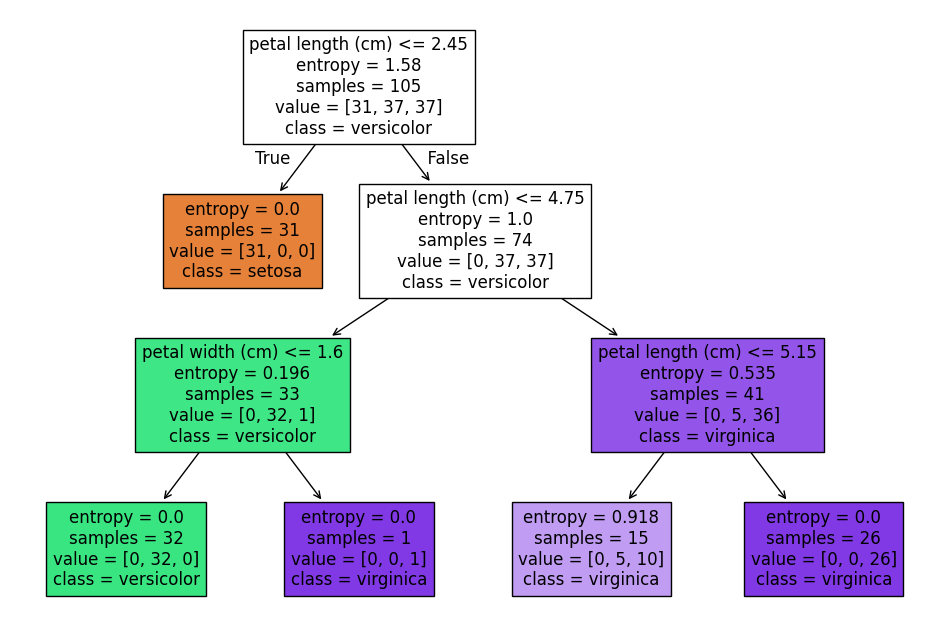

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 1. Wczytanie danych
iris = load_iris()
X = iris.data
y = iris.target

# 2. Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Utworzenie modelu drzewa decyzyjnego
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# 4. Trenowanie modelu
tree.fit(X_train, y_train)

# 5. Ocena jakości modelu
score = tree.score(X_test, y_test)
print(f"Dokładność modelu: {score:.2f}")

# 6. Wizualizacja drzewa
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


 
---

## 🧠 1️⃣ Dane wejściowe

Masz np. 4 cechy:

```
sepal length, sepal width, petal length, petal width
```

i etykiety (`setosa`, `versicolor`, `virginica`).

Drzewo musi zdecydować, **od której cechy zacząć** – czyli która **najlepiej rozdziela klasy** (czyli tworzy „czystsze” grupy po podziale).

---

## ⚙️ 2️⃣ Jak wybiera tę cechę

Drzewo testuje każdą cechę (np. `petal length`) i różne **progi podziału** (np. `petal length < 2.5 cm`), i dla każdego z nich mierzy, **jak bardzo uporządkowane** są klasy po tym podziale.

Do tego używa **miary czystości (impurity)**:

* **Gini impurity**
* **Entropia (information gain)**

---

### 🔍 Gini impurity – intuicja

Formuła:
$$
Gini = 1 - \sum_{i=1}^K p_i^2
$$
gdzie ( p_i ) to udział klasy *i* w danym węźle.

* Jeśli w węźle są tylko kwiaty *setosa* → $( p = 1 )$, więc Gini = 0 (czysty podział)
* Jeśli w węźle są 3 gatunki po równo → $( p_i = 1/3 )$, więc Gini = 0.67 (bałagan)

---

### 🔍 Entropia – alternatywa

Formuła:
$$
Entropy = - \sum_{i=1}^K p_i \log_2(p_i)
$$

* Entropia = 0 → idealny porządek
* Entropia = wysoka → duży chaos

Drzewo szuka **największego spadku entropii** po podziale (czyli największego *information gain*).

---

## 🧮 3️⃣ Proces wyboru najlepszej cechy

1. Dla każdej cechy (np. długość płatka):

   * Sprawdza wszystkie możliwe progi (np. 2.0, 2.1, 2.2, …)
   * Dzieli dane na dwie grupy: `< próg` i `>= próg`
   * Oblicza średnią „czystość” tych dwóch grup.
2. Wybiera **ten próg i tę cechę**, które dają **najczystszy wynik**.
3. Tworzy **węzeł drzewa** z tym warunkiem.

---

## 🌿 4️⃣ Rekurencja

Potem proces się powtarza:

* Po lewej stronie (dla danych z warunku `< próg`)
* Po prawej stronie (dla danych `>= próg`)

Każdy podział tworzy kolejne „pytanie” w drzewie, aż:

* wszystkie dane w gałęzi są z tej samej klasy,
* lub osiągnięto `max_depth`.

---

## 📊 5️⃣ Wizualizacja myślenia drzewa

Przykładowy fragment drzewa Iris:

```
petal length (cm) <= 2.45
|--- class: setosa
petal width (cm) <= 1.75
|   |--- class: versicolor
|   |--- class: virginica
```

Drzewo „zaczyna” od pytania, które **najlepiej oddziela setosę**, a potem rozdziela pozostałe.

---
 
 

In [10]:
# Nowy kwiat
example = [[5.0, 3.6, 1.4, 0.2]]  # długości i szerokości

prediction = tree.predict(example)
print("Przewidziany gatunek:", iris.target_names[prediction[0]])


Przewidziany gatunek: setosa



👉 zamiast ufać jednemu drzewu decyzyjnemu, **lepiej mieć cały las drzew** i pozwolić im głosować.

To właśnie **losowy las (ang. Random Forest)**.
Zrozummy go **od podstaw — intuicyjnie i praktycznie**.

---

## 🧠 1️⃣ Problem z jednym drzewem

Drzewo decyzyjne jest:

* proste, interpretowalne, ale...
* **bardzo wrażliwe na dane** — mały szum lub zmiana w zbiorze może całkowicie zmienić strukturę drzewa;
* często **przeucza się (overfitting)** — uczy się szczegółów zamiast ogólnych wzorców.

Przykład:
Jedno drzewo może uznać, że *versicolor* ma `petal length = 4.9`, a inne, że `5.0`.
Takie różnice nie powinny zmieniać decyzji — a jednak mogą.

---

## 🌲 2️⃣ Pomysł na losowy las

**Random Forest = wiele drzew decyzyjnych**, które uczą się niezależnie, a potem **głosują razem**.

Każde drzewo:

* dostaje **losowy podzbiór danych treningowych** (to się nazywa *bootstrap sampling*);
* przy każdym podziale rozważa **losowy zestaw cech** (np. tylko 2 z 4 cech Iris);
* więc każde drzewo „widzi świat” trochę inaczej.

Na końcu każdy z nich mówi:

> „Myślę, że to *setosa*” albo „to *virginica*” — i las wybiera większość głosów 🗳️.

---

## ⚙️ 3️⃣ Zalety Random Forest

✅ **Stabilność** — mały szum w danych nie psuje modelu.
✅ **Lepsza dokładność** — bo średnia z wielu drzew redukuje błędy pojedynczych.
✅ **Radzi sobie z przeuczeniem** — dzięki losowości i uśrednianiu.
✅ **Wbudowana miara ważności cech** — pokazuje, które cechy są naprawdę istotne.

---

## 🧮 4️⃣ Kod w Pythonie – Random Forest na Iris


In [11]:

 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Dane
iris = load_iris()
X = iris.data
y = iris.target

# Podział
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model lasu
forest = RandomForestClassifier(
    n_estimators=100,      # liczba drzew
    criterion='entropy',   # jak mierzymy podziały
    max_depth=4,           # maksymalna głębokość drzewa
    random_state=42
)

# Trening
forest.fit(X_train, y_train)

# Predykcja
y_pred = forest.predict(X_test)

# Wyniki
print("Dokładność:", accuracy_score(y_test, y_pred))
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred))
 

Dokładność: 1.0

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



 
## 📊 5️⃣ Sprawdź ważność cech

Po treningu możesz zobaczyć, które cechy są najważniejsze dla całego lasu:
 


In [12]:
import pandas as pd

importance = pd.Series(forest.feature_importances_, index=iris.feature_names)
print(importance.sort_values(ascending=False))

petal width (cm)     0.435912
petal length (cm)    0.435119
sepal length (cm)    0.107261
sepal width (cm)     0.021708
dtype: float64



Czyli znów płatki — ale tym razem **wynik pochodzi z uśrednienia wielu drzew**, więc jest bardziej wiarygodny.

---

## 🧩 6️⃣ Podsumowanie intuicyjnie

| Cecha              | Drzewo decyzyjne 🌳 | Losowy las 🌲🌲🌲      |
| ------------------ | ------------------- | ---------------------- |
| Liczba modeli      | 1                   | wiele (np. 100)        |
| Czułość na szum    | duża                | mała                   |
| Ryzyko przeuczenia | wysokie             | niskie                 |
| Interpretacja      | bardzo prosta       | trudniejsza (ensemble) |
| Dokładność         | dobra               | często lepsza          |

 

### 🧩 Macierz pomyłek (Confusion Matrix)

**Macierz pomyłek** to tabela, która pokazuje, **jak dobrze model klasyfikacyjny rozpoznaje poszczególne klasy**.
Każdy wiersz to **rzeczywista klasa**, a każda kolumna to **klasa przewidziana przez model**.

✅ **Na przekątnej** – poprawne klasyfikacje
❌ **Poza przekątną** – błędy (pomyłki między klasami)

---

### 📈 Po co to robić?

* Pokazuje **gdzie model się myli**, a nie tylko ogólną dokładność.
* Pomaga zrozumieć, **które klasy są mylone ze sobą**.
* **Szczególnie ważna przy więcej niż dwóch klasach** (np. *setosa*, *versicolor*, *virginica*), bo wtedy sama dokładność nie wystarcza.

---

**Warto ją robić zawsze**, gdy model klasyfikuje **więcej niż 2 klasy** – daje pełniejszy obraz jego zachowania.


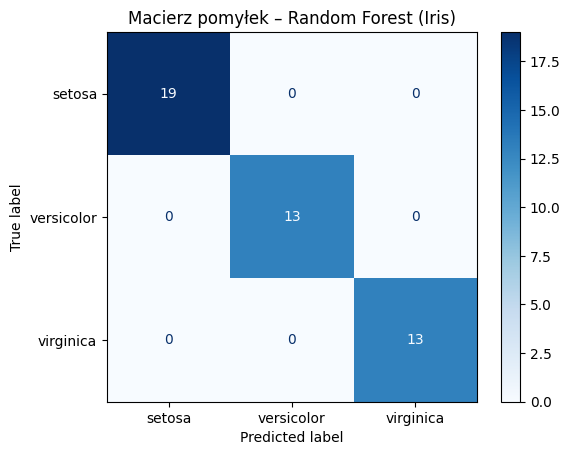

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Przewidywania
y_pred = forest.predict(X_test)

# Macierz pomyłek
cm = confusion_matrix(y_test, y_pred)

# Wizualizacja
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues', values_format='d')
plt.title("Macierz pomyłek – Random Forest (Iris)")
plt.show()
